# HIV MODEL
Emma Mack

In [98]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from matplotlib import pyplot as plt

In [109]:
def make_system(params,uninf,lat_inf,act_inf,virions, dt):
    
    Γ,μ,τ,β,ρ,α,σ,δ,π=params
    
    init=State(R=uninf,
               L=lat_inf,
               E=act_inf,
               V=virions)
    
    return System(init=init,Γ=Γ,τ=τ,μ=μ,π=π,σ=σ,β=β,ρ=ρ,δ=δ,α=α, dt=dt)


In [101]:
def update_func(state, system):
    """Update the HIV model.
    
    state: State with variables r, l, e, v
    system: System with all parameters
    
    returns: State object
    """
    unpack(system)
    
    r, l, e, v = state
    
    uninf = Γ*τ - μ*r - β*r*v
    lat_inf = ρ*β*r*v - μ*l - α*l
    act_inf = (1 - ρ)*β*r*v + α*l - δ*e
    virions = π*e - σ*v
    
    r += uninf*dt
    l += lat_inf*dt
    e += act_inf*dt
    v += virions*dt
    
    return State(R=r, L=l, E=e, V=v)

In [114]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[0] = system.init
    
    for t in linrange(0, 120/dt, dt):
        frame.row[t+dt] = update_func(frame.row[t], system)
    
    return frame

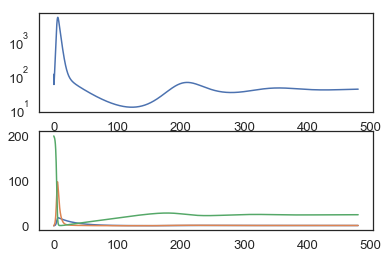

In [115]:
params=Params(Γ=1.36,μ=0.00136,τ=0.2,β=0.00027,ρ=0.1,α=0.036,σ=2,δ=0.33,π=100)

system = make_system(params,200,0,0,100,0.25)
results = run_simulation(system, update_func)

plt.subplot(2,1,1)
plt.plot(results.V)
plt.yscale('log')

plt.subplot(2,1,2)
plt.plot(results.L)
plt.plot(results.E)
plt.plot(results.R)

In [116]:
# def slope_func(state, system):
#     """Update the HIV model.
    
#     state: State with variables r, l, e, v
#     system: System with all parameters
    
#     returns: State object
#     """
#     unpack(system)
    
#     r, l, e, v = state
    
#     drdt = Γ*τ - μ*r - β*r*v
#     dldt = ρ*β*r*v - μ*l - α*l
#     dedt = (1 - ρ)*β*r*v + α*l - δ*e
#     dvdt = π*e - σ*v
    
#     return drdt, dldt, dedt, dvdt